### Topics
- Topics or themes are a group of statistically significant “tokens” or words in a “corpus”.


### Topic Modelling
- Topic modeling is is an unsupervised learning process of automatically finding the hidden topics in textual data. It is also referred to as the text or information mining technique that has the aim to find the recurring patterns in the words present in the corpus.

 ### Latent Dirichlet Allocation (LDA)

### Lets assume 5 documents

In [1]:
doc1 = "I want to watch a movie this weekend."
doc2 = "I went shopping yesterday. New Zealand won the World Test Championship by beating India."
doc3 = "I don’t watch cricket. Netflix and Amazon Prime have very good movies to watch."
doc4 = "Movies are a nice way to chill however, this time I would like to paint and read some good books."
doc5 = "Awaken the Gaint is so good! Try reading Tony Robbin’s books."

In [2]:
corpus = [doc1,doc2,doc3,doc4,doc5]

Document Term Matrix willbe as below

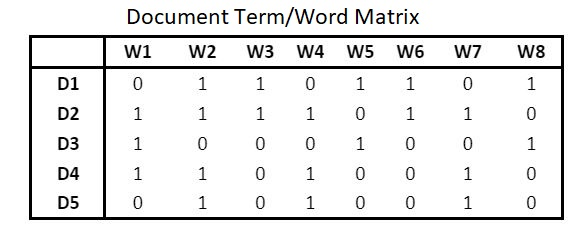

LDA converts this document-word matrix into two other matrices: Document Term matrix and Topic Word matrix as shown below:

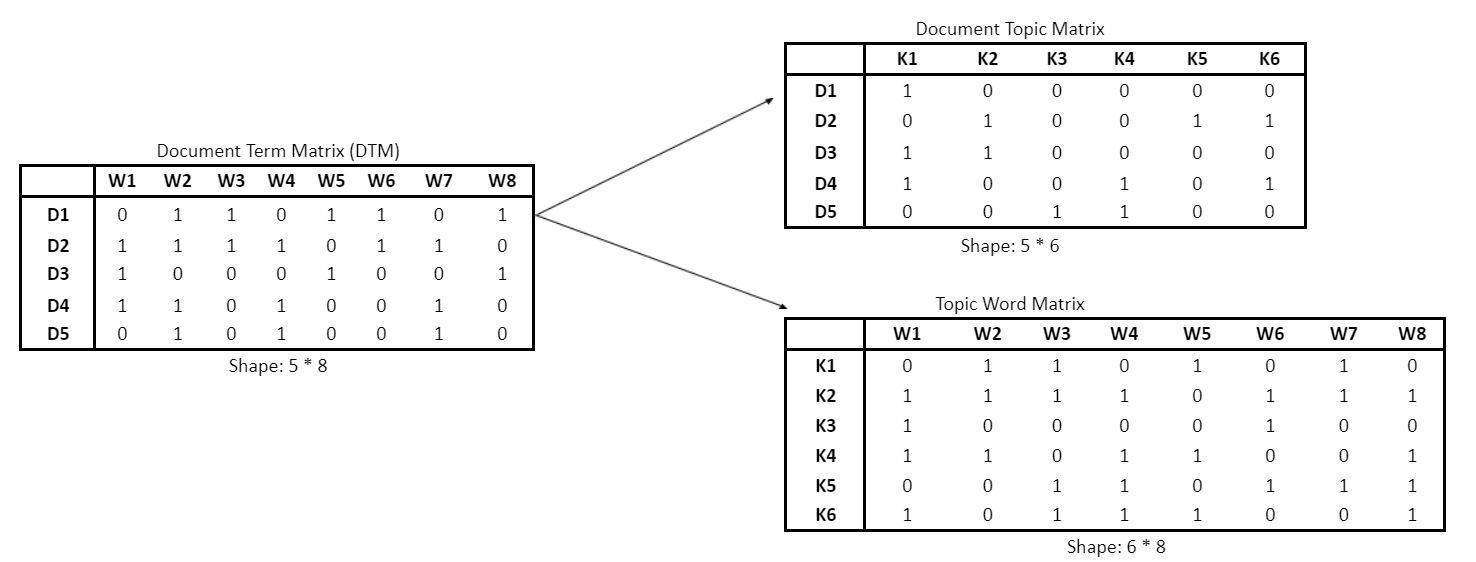

- The Document-Topic matrix already contains the possible topics (represented by K above) that the documents can contain. Here, suppose we have 6 topics and had 5 documents so the matrix is of dimension 5*6
- The Topic-Word matrix has the words (or terms) that those topics can contain. We have 6 topics and 8 unique tokens in the vocabulary hence the matrix had a shape of 6*8.

The LDA makes two assumptions:
- Documents are a mixture of topics, and
- Topics are a mixture of tokens (or words)

Now, our corpus that had 5 documents (D1 to D5) and with their respective number of words:
- D1 = (w1, w2, w3, w4, w5, w6, w7, w8)
- D2 = (w'1, w'2, w'3, w'4, w'5, w'6, w'7, w'8, w'9, w'10)
- D3 = (w"1, w"2, w"3, w"4, w"5, w"6, w"7, w"8, w"9, w"10, w"11, w"12, w"13, w"14 w"15)
- D4 = (w"'1, w"'2, w"'3, w"'4, w"'5, w"'6, w"'7, w"'8, w"'9, w"'10, w"'11, w"'12)
- D5 = (w““1, w““2, w““3, w““4, w““5, w““6, w““7, w““8, w““9, w““10,…, w““32, w““33, w““34)

#### LDA is an iterative process
The first iteration of LDA:
In the first iteration, it randomly assigns the topics to each word in the document. The topics are represented by the letter k. So, in our corpus, the words in the documents will be associated with some random topics like below:

- D1 = (w1 (k5), w2 (k3), w3 (k1), w4 (k2), w5 (k5), w6 (k4), w7 (k7), w8(k1))
- D2 = (w'1(k2), w'2 (k4), w'3 (k2), w'4 (k1), w'5 (k2), w'6 (k1), w'7 (k5), w'8(k3), w'9 (k7), w'10(k1))
- D3 = (w“1(k3), w“2 (k1), w“3 (k5), w“4 (k3), w“5 (k4), w“6(k1),…, w“13 (k1), w“14(k3), w“15 (k2))
- D4 = (w“'1(k4), w“'2 (k5), w“'3 (k3), w“'4 (k6), w“'5 (k5), w“'6 (k3) …, w“'10 (k3), w“'11 (k7), w“'12 (k1))
- D5 = (w““1 (k1), w““2 (k7), w““3 (k2), w““4 (k8), w““5 (k1), w““6(k8) …, w““32(k3), w““33(k6), w““34 (k5))

The documents are the mixture of the topics:

- D1 = k5 + k3 + k1 + k2 + k5 + k4 + k7+ k1
- D2 = k2 + k4 + k2 + k1 + k5 + k2 + k1+ k5 + k3 + k7 + k1
- D3 = k4 + k5 + k3 + k6 + k5 + k3 + … + k3+ k7 + k1
- D3 = k1 + k7 + k2 + k8 + k1 + k8 + … + k3+ k6 + k5

The topics are the mixture of the words:
- K1 = w3 + w8 + w'4 + w'6 + w’10 + w“2 + w“6 + … + w“13 + w“'12 + w““1 + w““5
- K2 = w4 + w'1 + w'3 + w“15 + …. + w““3 + …
- K3 = w2 + w’8 + w“1 + w“4 + w“14 + w“'3 + w“'6 + … + w“'10 + w““32 + …
- Similarly, LDA will give the word combinations for other topics.

LDA will iterate over: each document ‘D’ and each word ‘w’
and  tries to correct and adjust the topic assignment of the current word with a new assignment.
It does so by computing two probabilities: p1 and p2 for every topic (k) and word where:

- P1: proportion of words in the document (D) that are currently assigned to the topic (k)
- P2: is the proportion of assignments to the topic(k) over all documents that come from this word w.

The formula for p1 and p2 is:

- P1 = proportion (words assigned with topic k in document D / total words in document D)
- P2 = proportion (documents assigned with topic k for word w / all the documents with word w)

Now, using these probabilities p1 and p2, LDA estimates a new probability for every word and every topic, which is the product of (p1*p2).  Whichever topic has highest probability, LDA identifies that as new topic, or the most relevant topic for the current word.

Reassignment of word ‘w’ of the document ‘D’ to a new topic ‘k’ via the product probability of p1 * p2

This process of choosing the new topic ‘k’ is done for many iterations until a steady-state is obtained. The convergence point of LDA is obtained where it gives the most optimized representation of the document-term matrix and topic-word matrix.

In [3]:
import gensim
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re
import string 
from gensim.models.coherencemodel import CoherenceModel

In [4]:
import pandas as pd
data = pd.read_csv('bbc-text.csv')

In [5]:
data.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [6]:
corpus = data.text

In [7]:
corpus[1]

'worldcom boss  left books alone  former worldcom boss bernie ebbers  who is accused of overseeing an $11bn (£5.8bn) fraud  never made accounting decisions  a witness has told jurors.  david myers made the comments under questioning by defence lawyers who have been arguing that mr ebbers was not responsible for worldcom s problems. the phone company collapsed in 2002 and prosecutors claim that losses were hidden to protect the firm s shares. mr myers has already pleaded guilty to fraud and is assisting prosecutors.  on monday  defence lawyer reid weingarten tried to distance his client from the allegations. during cross examination  he asked mr myers if he ever knew mr ebbers  make an accounting decision  .  not that i am aware of   mr myers replied.  did you ever know mr ebbers to make an accounting entry into worldcom books   mr weingarten pressed.  no   replied the witness. mr myers has admitted that he ordered false accounting entries at the request of former worldcom chief financi

In [8]:
stop = set(stopwords.words('english'))
stop.update(set(['s','said','will','year','new','u','v','mr','s']))

In [9]:
print(stop)

{'myself', 'against', "it's", 'between', 'm', "wasn't", 'more', 'her', 'shouldn', 'that', 'what', 'it', 're', 'are', 'to', "hadn't", 'did', 'mustn', 'does', 'but', 's', 'each', "should've", 'hasn', 'very', 'with', 'don', 'because', 'y', 'up', "you'd", 'too', 'if', 'further', 'of', 'mightn', "needn't", "you've", 'until', 'themselves', "shouldn't", 'hers', 'when', 'is', "didn't", 'their', 'most', 'had', 'your', 'aren', 'been', 'in', 'some', 'his', 'above', 'nor', 'from', 've', 'yourselves', 'its', 'have', 'our', 'at', 'said', 'under', 'down', 'while', 'needn', 'am', 'i', 'or', 'd', 'this', 'itself', "aren't", 'after', 'by', 'o', 'was', "couldn't", 'couldn', 'shan', 'about', 'weren', 'same', 'having', 'not', 'should', 'any', 'me', 'those', 'were', 'now', 'hadn', "won't", 'll', "haven't", 'himself', 'an', 'whom', 'him', 'didn', "weren't", 'herself', 'than', 'where', 'as', 'being', "doesn't", "wouldn't", "mightn't", "hasn't", 'which', 'new', 'year', 'doing', 'will', 'over', "you'll", 'haven

In [10]:
punc = set(string.punctuation)

In [11]:
lemmatizer = WordNetLemmatizer()
def preprocess(text):
    stop_free = " ".join([i for i in text.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in punc)
    normalized = [lemmatizer.lemmatize(word) for word in punc_free.split()]
    return normalized

In [12]:
cleaned_corpus = [preprocess(text) for text in corpus]

In [13]:
#corpus[1]

In [14]:
print(cleaned_corpus[1])

['worldcom', 'bos', 'left', 'book', 'alone', 'former', 'worldcom', 'bos', 'bernie', 'ebbers', 'accused', 'overseeing', '11bn', '£58bn', 'fraud', 'never', 'made', 'accounting', 'decision', 'witness', 'told', 'juror', 'david', 'myers', 'made', 'comment', 'questioning', 'defence', 'lawyer', 'arguing', 'ebbers', 'responsible', 'worldcom', 'problem', 'phone', 'company', 'collapsed', '2002', 'prosecutor', 'claim', 'loss', 'hidden', 'protect', 'firm', 'share', 'myers', 'already', 'pleaded', 'guilty', 'fraud', 'assisting', 'prosecutor', 'monday', 'defence', 'lawyer', 'reid', 'weingarten', 'tried', 'distance', 'client', 'allegation', 'cross', 'examination', 'asked', 'myers', 'ever', 'knew', 'ebbers', 'make', 'accounting', 'decision', 'aware', 'myers', 'replied', 'ever', 'know', 'ebbers', 'make', 'accounting', 'entry', 'worldcom', 'book', 'weingarten', 'pressed', 'replied', 'witness', 'myers', 'admitted', 'ordered', 'false', 'accounting', 'entry', 'request', 'former', 'worldcom', 'chief', 'finan

In [15]:
from gensim import corpora
#create a dictionary that maps words in your text corpus to unique integer IDs. 
#This helps reduce dimensionality and improve processing efficiency.

In [16]:
d = corpora.Dictionary(cleaned_corpus)

In [17]:
d.token2id

{'000': 0,
 '100hours': 1,
 '26inch': 2,
 '50': 3,
 '80hour': 4,
 '90': 5,
 'abiding': 6,
 'according': 7,
 'adam': 8,
 'added': 9,
 'advert': 10,
 'advertising': 11,
 'alacarte': 12,
 'allow': 13,
 'allows': 14,
 'already': 15,
 'also': 16,
 'although': 17,
 'announced': 18,
 'annual': 19,
 'anybody': 20,
 'available': 21,
 'bbc': 22,
 'big': 23,
 'biggest': 24,
 'bill': 25,
 'book': 26,
 'box': 27,
 'brand': 28,
 'branded': 29,
 'broadband': 30,
 'broadcast': 31,
 'broadcaster': 32,
 'built': 33,
 'builtin': 34,
 'business': 35,
 'button': 36,
 'cable': 37,
 'called': 38,
 'capability': 39,
 'ce': 40,
 'challenge': 41,
 'channel': 42,
 'chief': 43,
 'choice': 44,
 'comfortable': 45,
 'commercial': 46,
 'communication': 47,
 'company': 48,
 'concern': 49,
 'connection': 50,
 'consumer': 51,
 'content': 52,
 'control': 53,
 'could': 54,
 'crystal': 55,
 'delivered': 56,
 'device': 57,
 'diaper': 58,
 'different': 59,
 'digital': 60,
 'directtv': 61,
 'discus': 62,
 'display': 63,
 'dvd

In [18]:
d.doc2bow(['tv','tu'])  # [(id, freq)]

[(235, 1), (28159, 1)]

In [19]:
print(d)

Dictionary<30053 unique tokens: ['000', '100hours', '26inch', '50', '80hour']...>


In [20]:
doc_term_matrix = [d.doc2bow(i) for i in cleaned_corpus]

In [21]:
doc_term_matrix

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 2),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 3),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 3),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 2),
  (28, 6),
  (29, 1),
  (30, 2),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 2),
  (38, 1),
  (39, 2),
  (40, 2),
  (41, 1),
  (42, 5),
  (43, 1),
  (44, 2),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 3),
  (49, 1),
  (50, 1),
  (51, 2),
  (52, 4),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 2),
  (58, 1),
  (59, 1),
  (60, 2),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 4),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 2),
  (73, 1),
  (74, 2),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 2),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 2),
  (88, 1),
  (89, 1),
  (90, 1),
  (91, 2)

In [22]:
Lda = gensim.models.ldamodel.LdaModel

In [23]:
lda_model = Lda(doc_term_matrix,num_topics=5,id2word=d,passes=10,random_state=0)

#### Higher the coherence score better the topic model

In [24]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=cleaned_corpus, dictionary=d, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.49203770326220464


In [25]:
lda_model.print_topics()

[(0,
  '0.010*"u" + 0.006*"company" + 0.006*"market" + 0.005*"sale" + 0.005*"would" + 0.005*"bank" + 0.004*"firm" + 0.004*"price" + 0.004*"2004" + 0.004*"uk"'),
 (1,
  '0.012*"film" + 0.008*"award" + 0.006*"best" + 0.005*"also" + 0.005*"one" + 0.005*"music" + 0.004*"game" + 0.004*"show" + 0.004*"first" + 0.004*"u"'),
 (2,
  '0.010*"people" + 0.007*"phone" + 0.007*"mobile" + 0.007*"technology" + 0.005*"game" + 0.005*"user" + 0.004*"service" + 0.004*"use" + 0.004*"one" + 0.004*"also"'),
 (3,
  '0.007*"player" + 0.006*"game" + 0.006*"england" + 0.004*"said" + 0.004*"first" + 0.004*"would" + 0.004*"time" + 0.004*"win" + 0.004*"cup" + 0.004*"back"'),
 (4,
  '0.010*"would" + 0.007*"blair" + 0.007*"party" + 0.007*"labour" + 0.007*"said" + 0.006*"election" + 0.006*"government" + 0.006*"people" + 0.005*"minister" + 0.005*"say"')]

In [26]:
#!pip install pyLDAvis

In [27]:
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
p = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, d)

In [28]:
p

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.029731 -0.099922       1        1  24.266966
0      0.143914 -0.077145       2        1  21.540274
2      0.108850  0.152367       3        1  19.701859
3     -0.147632 -0.064147       4        1  17.311893
1     -0.134863  0.088847       5        1  17.179007, topic_info=        Term         Freq        Total Category  logprob  loglift
639     film  1112.000000  1112.000000  Default  30.0000  30.0000
742    blair   858.000000   858.000000  Default  29.0000  29.0000
1129   award   666.000000   666.000000  Default  28.0000  28.0000
803   labour   797.000000   797.000000  Default  27.0000  27.0000
344    phone   763.000000   763.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
1051   world   250.120760  1128.143581   Topic5  -5.8089   0.2551
849     said   271.362969  2094.322360   Topic5  -5.7274  -0.2820
322     last   237.819866  1200.201101   Topic5  -5.8593   0.1428
228     time   240.565126  1401.130981   Topic5  -5.8479  -0.0006
369      two   227.208494  1109.760216   Topic5  -5.9050   0.1755

[394 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
1223      1  0.022705  2004
1223      2  0.590317  2004
1223      3  0.205760  2004
1223      4  0.028381  2004
1223      5  0.153255  2004
...     ...       ...   ...
256       2  0.317129  year
256       3  0.152387  year
256       4  0.168037  year
256       5  0.216636  year
1790      2  0.979680   yen

[809 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 3, 4, 2])

In [29]:
from gensim.matutils import cossim
doc0 = lda_model.get_document_topics(doc_term_matrix[0], minimum_probability=0)
doc1 = lda_model.get_document_topics(doc_term_matrix[2], minimum_probability=0)
doc2 = lda_model.get_document_topics(doc_term_matrix[3], minimum_probability=0)

doc0_topic = data.loc[0,'category']
doc1_topic = data.loc[2,'category']
doc2_topic = data.loc[3,'category']

print('doc0 belongs to '+ doc0_topic+ '\ndoc1 belongs to '+ doc1_topic+'\ncosine similarity between doc0 and doc1 is : '+ str(cossim(doc0, doc1)))
# print(cossim(doc1, doc2))
print()
print('doc1 belongs to '+ doc1_topic+ '\ndoc2 belongs to '+ doc2_topic+'\ncosine similarity between doc1 and doc2 is : '+ str(cossim(doc2, doc1)))
# print(cossim(doc1, doc2))

doc0 belongs to tech
doc1 belongs to sport
cosine similarity between doc0 and doc1 is : 0.005686348972646327

doc1 belongs to sport
doc2 belongs to sport
cosine similarity between doc1 and doc2 is : 0.9863253374606828


In [30]:
doc0_topic

'tech'

In [31]:
doc1

[(0, 0.0015772165),
 (1, 0.0015690255),
 (2, 0.0015862697),
 (3, 0.839583),
 (4, 0.15568452)]

In [32]:
doc2

[(0, 0.0008721148),
 (1, 0.00089088955),
 (2, 0.0008660511),
 (3, 0.9799354),
 (4, 0.017435525)]

In [33]:
data.iloc[2]

category                                                sport
text        tigers wary of farrell  gamble  leicester say ...
Name: 2, dtype: object

In [34]:
data.iloc[3]

category                                                sport
text        yeading face newcastle in fa cup premiership s...
Name: 3, dtype: object

In [35]:
data.iloc[0]

category                                                 tech
text        tv future in the hands of viewers with home th...
Name: 0, dtype: object

In [36]:
data.iloc[0]['text']

'tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to high

In [37]:
data.iloc[24]['text']

'mobile audio enters new dimension as mobile phones move closer to being a ubiquitous  all-in-one media player  audio is becoming ever more important. but how good can that sound be from such a small device   the sound of a buzzing bee jumps from left to right before disappearing around the back of my head. the surround sound demo is unremarkable when heard on a multi-speaker home cinema system but startling when emerging from a small mobile phone. british firm sonaptic is one of a number of companies to have developed 3d audio technology that emerges from stereo speakers. firms am3d and srs both offer stereo-widening technology for mobile phones. but sonaptic s managing director david monteith says his firm is the only company to offer positional 3d audio on a mobile.   there are quite a few basic technologies out there  making the sound seem a bit bigger  headphones a bit nicer.   no-one has really tried before to make proper 3d positional audio - where an individual channel can be m

In [38]:
data[data.category=='sport']

,category,text
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
7,sport,henman hopes ended in dubai third seed tim hen...
8,sport,wilkinson fit to face edinburgh england captai...
14,sport,moya emotional after davis cup win carlos moya...
...,...,...
2190,sport,newry to fight cup exit in courts newry city a...
2195,sport,owen delighted with real display michael owen ...
2209,sport,time to get tough on friendlies for an intern...
2218,sport,davies favours gloucester future wales hooker ...


In [39]:
doc1

[(0, 0.0015772165),
 (1, 0.0015690255),
 (2, 0.0015862697),
 (3, 0.839583),
 (4, 0.15568452)]